<a href="https://colab.research.google.com/github/the-confused-genius/Advertisingsales/blob/main/Advertisingsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

%matplotlib inline 

In [7]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

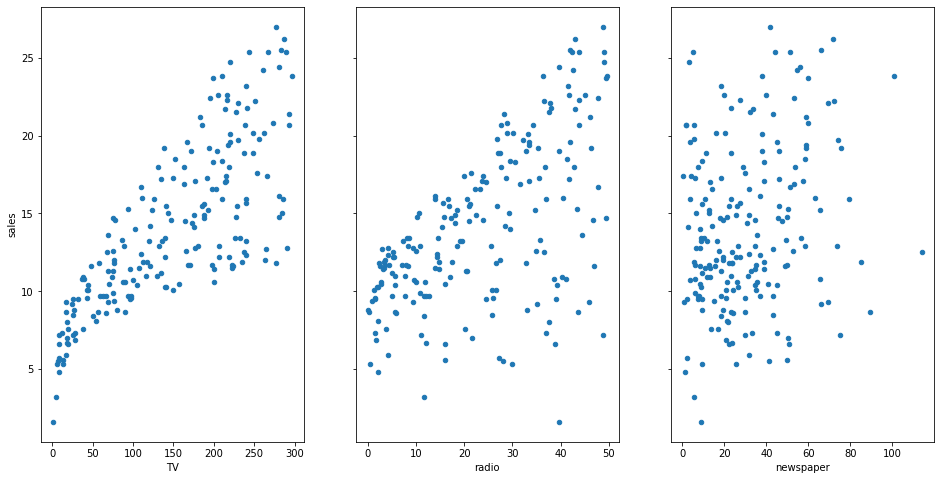

In [9]:
fig,axs = plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [33]:
x = df['TV']
y = df['sales']
x = np.array([x])
x = x.reshape(-1,1)
x.ndim

2

In [34]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [35]:
print(model.intercept_)
print(model.coef_)

7.032593549127695
[0.04753664]


In [38]:
x_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [39]:
pred = model.predict(x_new)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ 7.0658692 , 21.12245377])

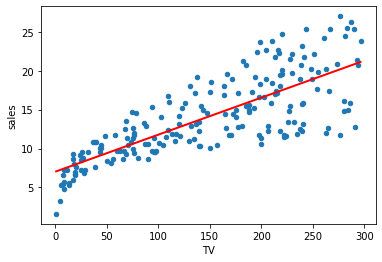

In [40]:
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,pred,c='red',linewidth=2)

In [41]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV',data=df).fit()

In [43]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [44]:
model.pvalues     #p values shows the relationship between two columns 

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [45]:
model.rsquared

0.611875050850071

In [47]:
X = df[['TV','radio','newspaper']]
Y = df['sales']

from sklearn import model_selection as ms
x_train,x_test,y_train,y_test = ms.train_test_split(X,Y,test_size=0.3,random_state=42)

In [49]:
model = LinearRegression()
model.fit(X,Y)
print(model.intercept_)
print(model.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [51]:
model.fit(x_train,y_train) 
print(model.intercept_)
print(model.coef_)

2.7089490925159048
[0.04405928 0.1992875  0.00688245]


In [53]:
pred = model.predict(x_test)
print(sqrt(mean_squared_error(y_test,pred)))

1.9485372043446385


In [55]:
model = smf.ols(formula='sales~TV + radio + newspaper',data=df).fit()
model.conf_int()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        18:17:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model = smf.ols(formula='sales~TV+radio',data=df).fit()
model.rsquared

0.8971942610828956

In [57]:
np.random.seed(12345)

nums = np.random.rand(len(df))
mask_large = nums > 0.5
df['size'] = 'small'
df.loc[mask_large,'size'] = 'large'
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,size
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [62]:
df['Islarge'] = df['size'].map({'small':0,'large':1})
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,size,Islarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


In [64]:
feature_cols = ['TV','radio','newspaper','Islarge']
x = df[feature_cols]
y = df['sales']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [65]:
np.random.seed(123456)

nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums <0.66)
mask_urban = nums > 0.66
df['Area'] = 'rural'
df.loc[mask_suburban,'Area'] ='suburban'
df.loc[mask_urban,'Area'] = 'urban'
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,size,Islarge,Area
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban


In [70]:
area_dum = pd.get_dummies(df['Area'],prefix = 'Area').iloc[:,1:]

df = pd.concat([df,area_dum],axis = 1)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,size,Islarge,Area,Area_suburban,Area_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [72]:
feature_cols = ['TV','radio','newspaper','Islarge','Area_suburban','Area_urban']
x = df[feature_cols]
y = df['sales']

model =LinearRegression()
model.fit(x,y)
print(model.coef_)

[ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
